In [1]:
import netCDF4
from netCDF4 import Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

%matplotlib notebook

Import the outputfile from FM1d


[130000. 130500. 131000. 131500. 132000. 132500. 133000. 133500. 134000.
 134500. 135000. 135500. 136000. 136500. 137000. 137500. 138000. 138500.
 139000. 139500. 140000. 140500. 141000. 141500. 142000. 142500. 143000.
 143500. 144000. 144500. 145000. 145500. 146000. 146500. 147000. 147500.
 148000. 148500. 149000. 149500. 150000. 150500. 151000. 151500. 152000.
 152500. 153000. 153500. 154000. 154500. 155000. 155500. 156000. 156500.
 157000. 157500. 158000. 158500. 159000. 159500. 160000. 160500. 161000.
 161500. 162000. 162500. 163000. 163500. 164000. 164500. 165000. 165500.
 166000. 166500. 167000. 167500. 168000. 168500. 169000. 169500. 170000.
 170500. 171000. 171500. 172000. 172500. 173000. 173500. 174000. 174500.
 175000. 175500. 176000. 176500. 177000. 177500. 178000. 178500. 179000.
 179500. 180000.]


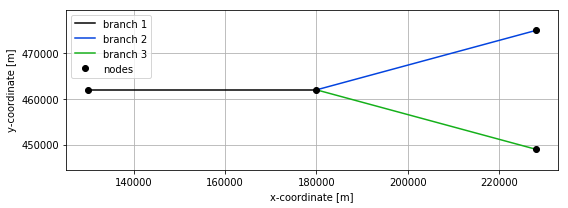

In [2]:
c = ['xkcd:black','xkcd:blue','xkcd:green']

caseid = 'c11' # check for case

B = [300,150,100] #branch width (flow width)
k = 1 # check for case
m = 0 # check for case

figmap = r'..\doc\figures'
maps = r'..\dflowfmoutput\c01_map.nc'
nc = Dataset(maps)
nc

x = nc.variables['mesh1d_node_x'][:].data
y = nc.variables['mesh1d_node_y'][:].data
time = nc.variables['time'][:].data

bl = nc.variables['mesh1d_mor_bl'][:,:].data


br1_x = x[y==y[0]]
br1_y = y[y==y[0]] 
br2_x = x[y>=y[0]]
br2_y = y[y>=y[0]]
br3_x = x[y<=y[0]]
br3_y = y[y<=y[0]]

print(br1_x)


fig1,ax = plt.subplots(figsize=(8,3))
ax.plot(br1_x,br1_y,'-', label = 'branch 1', color = c[0])  # 
ax.plot(br2_x[100:201],br2_y[100:201],'-', label = 'branch 2',color = c[1])
ax.plot(br3_x[100:201],br3_y[100:201],'-', label = 'branch 3',color = c[2])

ax.plot(x[[0,100,200,300]],y[[0,100,200,300]],'o',color = 'black',label = 'nodes')
ax.legend()
ax.grid()
ax.axis('equal')
ax.set_xlabel('x-coordinate [m]')
ax.set_ylabel('y-coordinate [m]')
fig1.tight_layout()
fig1.savefig(os.path.join(figmap,caseid+'_bifurcation_network.png'))

i = []

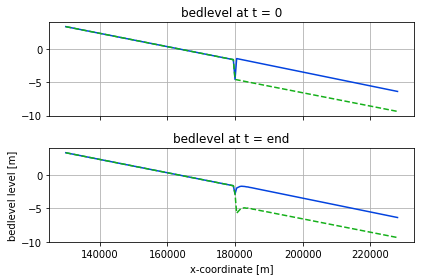

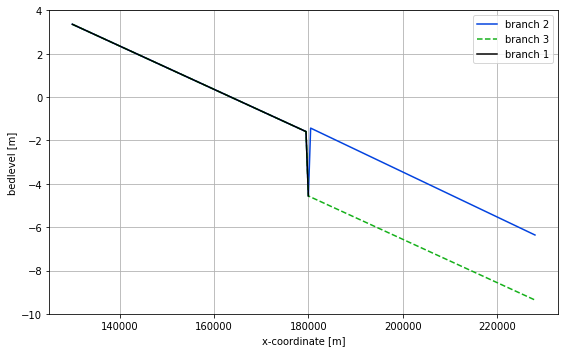

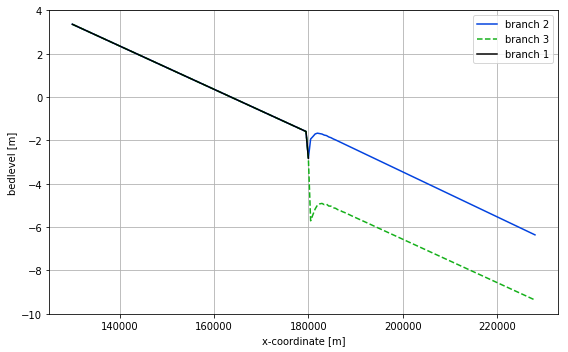

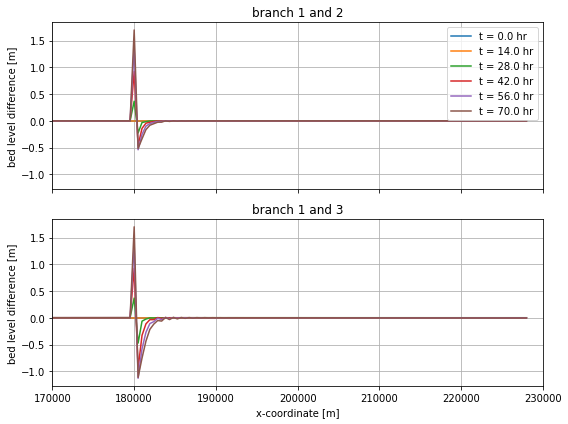

In [3]:
bl2 = bl[:,y>=y[0]]
bl3 = bl[:,y<=y[0]]

fig1,ax = plt.subplots(2,1,sharex= True,sharey = True)
ax[0].plot(br2_x,bl2[0,:],color = c[1])
ax[0].plot(br3_x,bl3[0,:],'--',color = c[2])
ax[0].set_title('bedlevel at t = 0')
ax[0].grid()

ax[1].plot(br2_x,bl2[-1,:],label = 'branch 2',color = c[1])
ax[1].plot(br3_x,bl3[-1,:],'--',label = 'branch 3',color = c[2])
ax[1].set_title('bedlevel at t = end')
ax[1].grid()
ax[1].legend

ax[1].set_xlabel('x-coordinate [m]')
ax[1].set_ylabel('bedlevel level [m]')

fig1.tight_layout()


fig2,t0 = plt.subplots(figsize=(8,5))

t0.plot(br2_x,bl2[0,:],color = c[1],label = 'branch 2')
t0.plot(br3_x,bl3[0,:],'--',color = c[2], label = 'branch 3')
t0.plot(br1_x[0:101],bl[0,0:101],color = c[0],label = 'branch 1')

# t0.set_title('bedlevel at t = 0')
t0.grid()
t0.legend()

t0.set_ylabel('bedlevel [m]')
t0.set_xlabel('x-coordinate [m]')

fig2.tight_layout()
fig2.savefig(os.path.join(figmap,caseid+'_initial_bedlevel.png'))



fig3,tend = plt.subplots(figsize=(8,5))

tend.plot(br2_x,bl2[-1,:],color = c[1],label = 'branch 2')
tend.plot(br3_x,bl3[-1,:],'--',color = c[2], label = 'branch 3')
tend.plot(br1_x[0:101],bl[-1,0:101],color = c[0],label = 'branch 1')

# t0.set_title('bedlevel at t = 0')
tend.grid()
tend.legend()

tend.set_ylabel('bedlevel [m]')
tend.set_xlabel('x-coordinate [m]')

fig3.tight_layout()
fig3.savefig(os.path.join(figmap,caseid+'_final_bedlevel.png'))

l = range(time.size)
l = l[0::np.round(time.size//5)]

fig4,dev = plt.subplots(2,1,figsize = (8,6),sharex = True,sharey = True)
dev[0].set_title('branch 1 and 2')
dev[1].set_title('branch 1 and 3')

for i in l:
    dev[0].plot(br2_x,bl2[i,:]-bl2[0,:], label = 't = {} hr'.format(time[i]/60/60))
    dev[1].plot(br3_x,bl3[i,:]-bl3[0,:], label = 't = {} hr'.format(time[i]/60/60))
dev[0].grid()
dev[0].legend()
dev[1].grid()
dev[0].set_ylabel('bed level difference [m]')
dev[1].set_ylabel('bed level difference [m]')
dev[1].set_xlabel('x-coordinate [m]')
dev[1].set_xlim(xmin = 170000,xmax = 230000)
fig4.tight_layout()
fig4.savefig(os.path.join(figmap,caseid+'_bed_development.png'))



In [4]:
Q = nc.variables['mesh1d_q1'][:,:].data  #m3 s-1 
s = nc.variables['mesh1d_sbn'][:,:,:].data.squeeze() #m3 s-1 m-1

Compare to the Wang formula
$\frac{S_2}{S_3} = \left(\frac{Q_2}{Q_3}\right)^k\left(\frac{B_2}{B_3}\right)^m.$
 
and plot the development of Q and S


In [5]:
k = 1
m = 0

S2_S3 = (Q[-1,100]/Q[-1,200])**k * (B[1]/B[2])**m
S2 = s[-1,100]*B[1]
S3 = s[-1,200]*B[2]

print('According to Wang S2/S3 = {}, in the simulation S2/S3 = {},  Q2/Q3 = {}'.format(S2_S3, S2/S3, Q[-1,100]/Q[-1,200]))

According to Wang S2/S3 = 0.8767461631637189, in the simulation S2/S3 = 0.8767461631637189,  Q2/Q3 = 0.8767461631637189


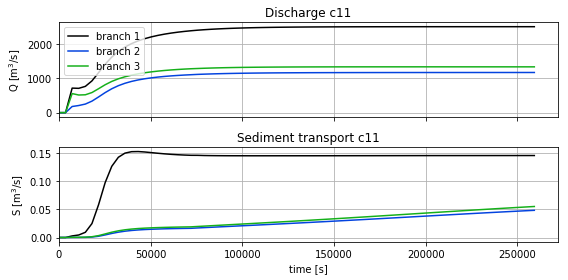

In [6]:
fig,ax = plt.subplots(2,1,sharex = True,figsize = (8,4))
ax[0].plot(time,Q[:,99], label = 'branch 1',color = c[0])
ax[0].plot(time,Q[:,100], label ='branch 2',color = c[1])
ax[0].plot(time,Q[:,200], label ='branch 3',color = c[2])
ax[0].legend()
# ax[0].set_xlabel('time [s]')
ax[0].set_ylabel('Q [m$^3$/s]')

ax[1].plot(time,s[:,99]*B[0],color = c[0])
ax[1].plot(time,s[:,100]*B[1],color = c[1])
ax[1].plot(time,s[:,200]*B[2],color = c[2])
# ax[1].legend()
ax[1].set_xlabel('time [s]')
ax[1].set_ylabel('S [m$^3$/s]')

ax[0].set_xlim(xmin = 0)
ax[0].grid()
ax[1].grid()

ax[0].set_title('Discharge {}'.format(caseid))
ax[1].set_title('Sediment transport {}'.format(caseid))

fig.tight_layout()
fig.savefig(os.path.join(figmap,caseid+'_QS_t.png'))



In [7]:
nc.close()